# Project Oxford: Emotion analysis example

### This Jupyter notebook shows you how to get started with the Project Oxford <b>Emotion API</b> in Python, and how to visualize your results.

To use this notebook, you will need to get keys to <b>Emotion API</b>. Visit <a href="http://www.projectoxford.ai/emotion">www.projectoxford.ai/emotion</a>, and then the “Try for free” button. On the “Sign in” page, use your Microsoft account to sign in and you will be able to subscribe to Emotion API and get free keys (Code of Conduct and TOS). After completing the sign-up process, paste your key into the variables section below. (Either the primary or the secondary key works.)

In [1]:
#import sys
#sys.path.append()
import sys
sys.setrecursionlimit(10000)

import time 
import requests
import cv2
import operator
import numpy as np

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

### Toggle raw code [on/off]
Script from [stackoverflow](https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer)


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [25]:
from __future__ import absolute_import
from IPython.core.getipython import get_ipython
from IPython.core.magic import (Magics, magics_class,  cell_magic)
import sys
from io import StringIO
from markdown import markdown
from IPython.core.display import HTML
 
@magics_class
class MarkdownMagics(Magics):
 
    @cell_magic
    def asmarkdown(self, line, cell):
        buffer = StringIO()
        stdout = sys.stdout
        sys.stdout = buffer
        try:
            exec(cell, locals(), self.shell.user_ns)
        except:
            sys.stdout = stdout
            raise
        sys.stdout = stdout
        return HTML("<p>{}</p>".format(markdown(buffer.getvalue(), extensions=['markdown.extensions.extra'])))
        return buffer.getvalue() + 'test'
 
get_ipython().register_magics(MarkdownMagics)

ImportError: No module named 'markdown'

In [3]:
# Variables

_url_em = 'https://api.projectoxford.ai/emotion/v1.0/recognize'
_key_em = "540378dd1a884c7786faea7f0f95ebbe" #Here you have to paste your primary key
_maxNumRetries = 10

## Helper functions

In [4]:
def processRequest( json, data, headers ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url_em, json = json, data = data, headers = headers, params = None )
        print(response)

        if response.status_code == 429: 

            print("Message: %s" % ( response.json()['error']['message'] ))

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print('Error: failed after retrying!')
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None
                    print(result) #prints all emotion dimensions
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print("Error code: %d" % ( response.status_code ))
            print("Message: %s" % ( response.json()['error']['message'] ))

        break
        
    return result

In [5]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,0,0), thickness = 5 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]


        textToWrite = "%s" % ( currEmotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1 )

## Detect faces from an image retrieved via URL

<Response [200]>
[{'scores': {'surprise': 1.8444446e-08, 'contempt': 7.023987e-11, 'happiness': 0.999999642, 'disgust': 7.105223e-08, 'fear': 4.51922749e-10, 'anger': 2.78199025e-07, 'neutral': 5.14203541e-11, 'sadness': 2.78147644e-10}, 'faceRectangle': {'height': 81, 'left': 343, 'width': 81, 'top': 107}}, {'scores': {'surprise': 1.12558791e-06, 'contempt': 0.003245356, 'happiness': 0.9807495, 'disgust': 4.64464065e-05, 'fear': 5.25078425e-09, 'anger': 1.39390318e-06, 'neutral': 0.0159545019, 'sadness': 1.68825477e-06}, 'faceRectangle': {'height': 70, 'left': 242, 'width': 70, 'top': 42}}, {'scores': {'surprise': 1.74096364e-08, 'contempt': 6.971509e-10, 'happiness': 0.999999464, 'disgust': 1.27989281e-07, 'fear': 2.61844435e-09, 'anger': 3.51527575e-07, 'neutral': 2.58172639e-09, 'sadness': 3.86494126e-09}, 'faceRectangle': {'height': 63, 'left': 155, 'width': 63, 'top': 76}}, {'scores': {'surprise': 1.00074359e-07, 'contempt': 2.59771241e-07, 'happiness': 0.9999935, 'disgust': 1.10

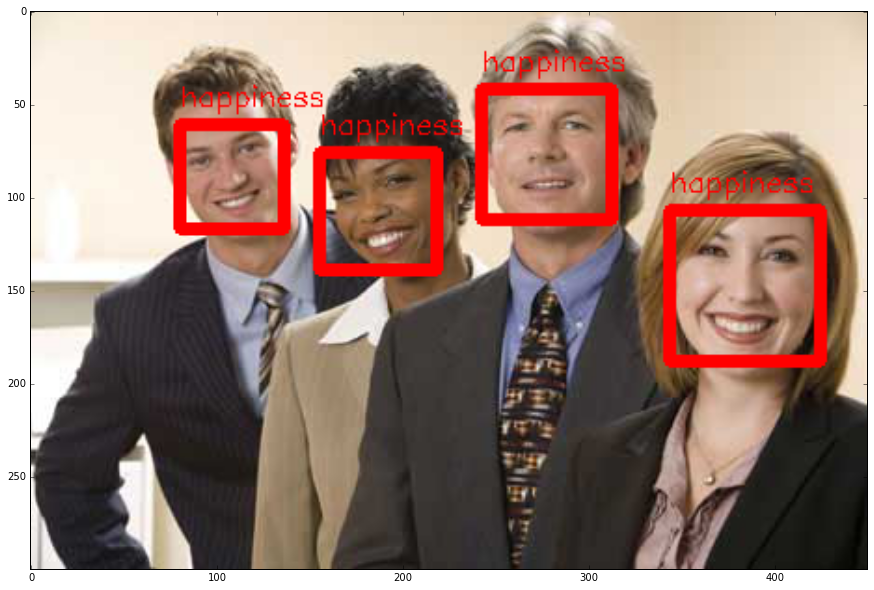

In [6]:
# URL direction to image
urlImage = 'http://robbygotay.weebly.com/uploads/1/0/4/1/10414969/1109901_orig.jpg'
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key_em
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None

result = processRequest( json, data, headers )

# Load the original image, fetched from the URL
arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

renderResultOnImage( result, img )

ig, ax = plt.subplots(figsize=(15, 20))
ax.imshow( img )

# Detect faces from an image stored on disk

<Response [200]>
[{'scores': {'surprise': 0.097585775, 'contempt': 0.00769645162, 'happiness': 0.384164959, 'disgust': 0.284250915, 'fear': 0.00104012049, 'anger': 0.0227314644, 'neutral': 0.195720941, 'sadness': 0.00680935336}, 'faceRectangle': {'height': 241, 'left': 613, 'width': 241, 'top': 116}}]


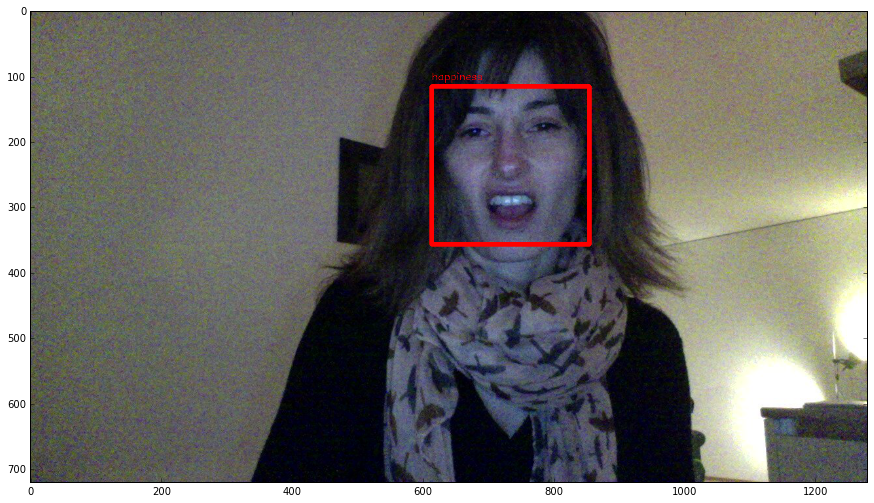

In [8]:
# Load raw image file into memory
pathToFileInDisk = r'./images/a2.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key_em
headers['Content-Type'] = 'application/octet-stream'

json = None

result = processRequest( json, data, headers )

# Load the original image from disk
data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

renderResultOnImage( result, img )

ig, ax = plt.subplots(figsize=(15, 20))
ax.imshow( img )

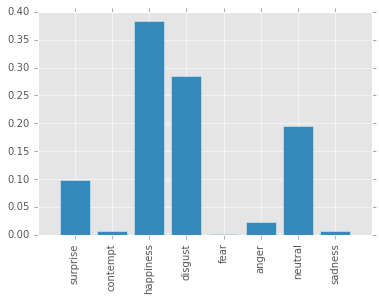

In [9]:
plt.style.use(['ggplot'])
d = result[0]['scores']
plt.bar(range(len(d)),d.values(), align='center')
plt.xticks(range(len(d)), d.keys(), rotation='vertical')
plt.show()

## Detect faces from an image stored on disc, visualize return values

Using code in three steps:
1. Render result on image
2. Render result data 
3. plot result image along with dataviz

In [10]:
# Load raw image file into memory
pathToFileInDisk = r'./images/a1.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key_em
headers['Content-Type'] = 'application/octet-stream'

json = None

result = processRequest( json, data, headers )

# Load the original image from disk
data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

renderResultOnImage( result, img )

<Response [200]>
[{'scores': {'surprise': 0.0008793083, 'contempt': 0.0031705026, 'happiness': 0.7252738, 'disgust': 0.003257258, 'fear': 6.250039e-05, 'anger': 0.000391381036, 'neutral': 0.2659737, 'sadness': 0.0009915505}, 'faceRectangle': {'height': 171, 'left': 613, 'width': 171, 'top': 250}}]


In [11]:
plt.style.use(['ggplot'])
d = result[0]['scores']

/home/catch22/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


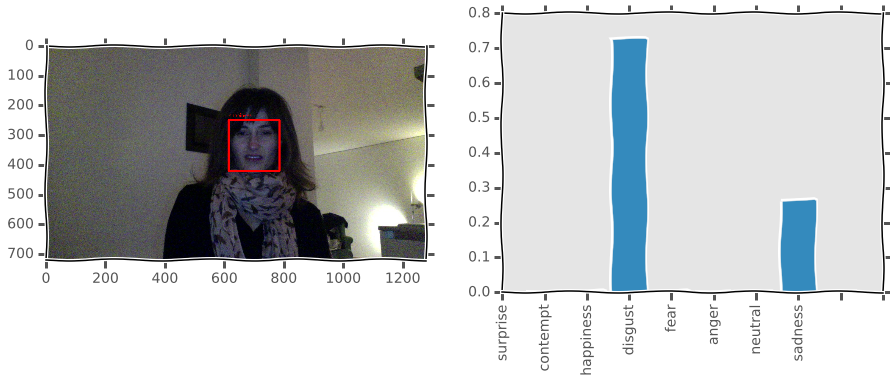

In [12]:
plt.xkcd()
ig, (ax_l, ax_r) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),)
ax_l.imshow( img )
ax_r.bar(range(len(d)),d.values(), align='center')
ax_r.set_xticklabels(d.keys(), rotation='vertical')

# Computer Vision API

In [13]:
# Variables

_url_cv = 'https://api.projectoxford.ai/vision/v1/analyses'
_key_cv = '5159b6f95c644ed0aa959cca453235ca' #Here you have to paste your primary key
_maxNumRetries = 1

## Helper functions

In [14]:
def cvProcessRequest( json, data, headers, params = None ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url_cv, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print("Message: %s" % ( response.json()['error']['message'] ))

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print('Error: failed after retrying!')
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print("Error code: %d" % ( response.status_code ))
            print("Message: %s" % ( response.json()['error']['message'] ))

        break
        
    return result

In [15]:
def cvRenderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""

    R = int(result['color']['accentColor'][:2],16)
    G = int(result['color']['accentColor'][2:4],16)
    B = int(result['color']['accentColor'][4:],16)

    cv2.rectangle( img,(0,0), (img.shape[1], img.shape[0]), color = (R,G,B), thickness = 25 )

    if 'categories' in result:
        categoryName = sorted(result['categories'], key=lambda x: x['score'])[0]['name']
        cv2.putText( img, categoryName, (30,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3 )

## Analysis of an image retrieved via URL

/home/catch22/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


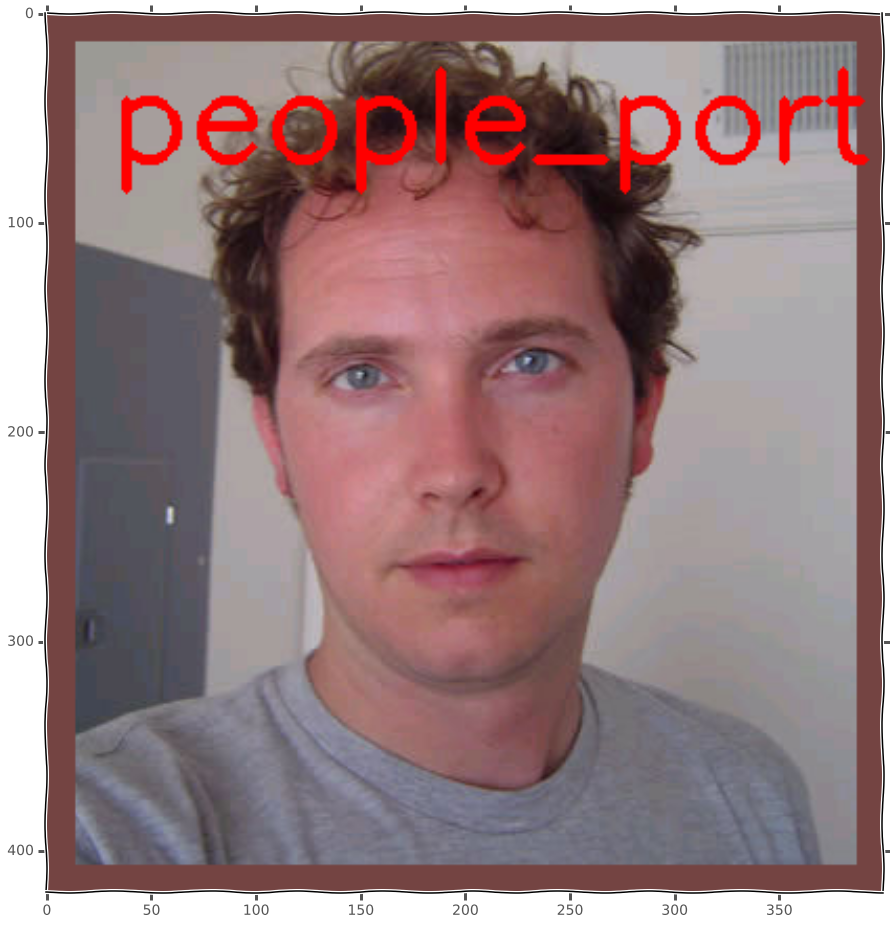

In [16]:
# URL direction to image
urlImage = 'http://dolfielittles.typepad.com/.a/6a0128765f7bac970c01901d5a7a32970b-pi'
# Computer Vision parameters
params = { 'visualFeatures' : 'Color,Categories'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key_cv
headers['Content-Type'] = 'application/json'

json = { 'url': urlImage } 
data = None

result = cvProcessRequest( json, data, headers, params )

# Load the original image, fetched from the URL
arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

cvRenderResultOnImage( result, img )

ig, ax = plt.subplots(figsize=(15, 20))
ax.imshow( img )

## Analysis of an image stored on disk

{'requestId': 'c84072ac-299c-4e70-897e-9c0ebd1b4871', 'tags': [{'confidence': 0.9993189573287964, 'name': 'outdoor'}, {'confidence': 0.9973675608634949, 'name': 'grass'}, {'confidence': 0.9928417205810547, 'name': 'tree'}, {'confidence': 0.9192278981208801, 'name': 'person'}, {'confidence': 0.8252260684967041, 'name': 'young'}], 'color': {'dominantColorBackground': 'Grey', 'dominantColors': ['Grey'], 'dominantColorForeground': 'Grey', 'isBWImg': False, 'accentColor': '94A823'}, 'categories': [{'score': 0.00390625, 'name': 'outdoor_'}, {'score': 0.61328125, 'name': 'people_many'}], 'faces': [{'gender': 'Female', 'faceRectangle': {'top': 439, 'left': 231, 'width': 42, 'height': 42}, 'age': 4}], 'metadata': {'height': 665, 'format': 'Jpeg', 'width': 1000}}
Female aged 4
outdoor: 0.9993189573287964
grass: 0.9973675608634949
tree: 0.9928417205810547
person: 0.9192278981208801
young: 0.8252260684967041


/home/catch22/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


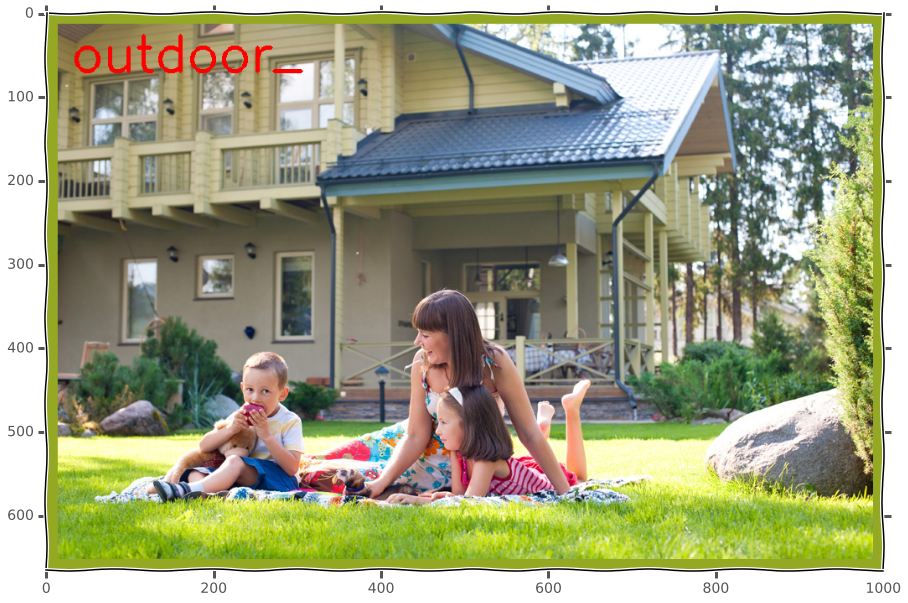

In [17]:
plt.clf()
# Load raw image file into memory
pathToFileInDisk = r'./images/house.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()
    
# Computer Vision parameters
params = { 'visualFeatures' : 'Color,Categories,Faces, Tags'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key_cv
headers['Content-Type'] = 'application/octet-stream'

json = None

result = cvProcessRequest( json, data, headers, params )

# Load the original image, fetched from the URL
data8uint = np.fromstring( data, np.uint8 )
img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB )

cvRenderResultOnImage( result, img )

print(result)

ig, ax = plt.subplots(figsize=(15, 20))
ax.imshow( img )

for face in result['faces']:
    print(face['gender']+" aged "+str(face['age']))
    
for tag in result['tags']:
    print(tag['name']+': '+str(tag['confidence']))